In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [4]:
data = pd.read_csv('wines_properties.csv')

In [5]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
Alcohol                 178 non-null float64
Malic_Acid              178 non-null float64
Ash                     178 non-null float64
Ash_Alcanity            178 non-null float64
Magnesium               178 non-null int64
Total_Phenols           178 non-null float64
Flavanoids              178 non-null float64
Nonflavanoid_Phenols    178 non-null float64
Proanthocyanins         178 non-null float64
Color_Intensity         178 non-null float64
Hue                     178 non-null float64
OD280                   178 non-null float64
Proline                 178 non-null int64
Customer_Segment        178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


In [7]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


In [8]:
data.nunique()

Alcohol                 126
Malic_Acid              133
Ash                      79
Ash_Alcanity             63
Magnesium                53
Total_Phenols            97
Flavanoids              132
Nonflavanoid_Phenols     39
Proanthocyanins         101
Color_Intensity         132
Hue                      78
OD280                   122
Proline                 121
Customer_Segment          3
dtype: int64

# 1) Non-PCA Approach

## 1.1) Linear Regression 

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [15]:
X = data.iloc[:,1:14].values
Y = data[['Alcohol']].values

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 0, test_size = 0.25)

In [17]:
model = LinearRegression()
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)

In [18]:
print(model.intercept_)

[11.77125639]


In [19]:
print(model.coef_)

[[ 1.06678450e-01  1.95478799e-01 -1.91679282e-02  3.02035514e-03
   1.85126306e-01  1.70718762e-02  1.15234266e-01 -2.52137194e-01
   1.94318395e-01  1.95964277e-01 -5.77228101e-02  3.54618276e-04
  -4.05978206e-01]]


In [20]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_test_pred)
print(r2)

0.49622632515694454


The $R^2$ Score is equal to $0.4962$

## 1.2) Logistic Regression 

### a) Feature Engineering

In [9]:
data2 = pd.read_csv('wines_properties.csv')

In [10]:
dummy_segment = pd.get_dummies(data2['Customer_Segment'], prefix='segment')

data2 = data2.iloc[:,:13].join(dummy_segment.loc[:, 'segment_2':])
data2.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,segment_2,segment_3
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0,0


In [11]:
data2['Alcohol'] = np.where(data2['Alcohol'] >= np.percentile(data2['Alcohol'], 75), 1, 0)

In [12]:
data2.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,segment_2,segment_3
0,1,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0,0
1,0,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0,0
2,0,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0,0
3,1,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0,0
4,0,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0,0


### b) Logistic Regression Model

In [21]:
from sklearn.linear_model import LogisticRegression

X2 = data2.iloc[:, 1:]
y2 = data2['Alcohol']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state = 0, test_size = 0.25)

In [22]:
model2 = LogisticRegression()
model2.fit(X2_train, y2_train)

y2_test_pred = model2.predict(X2_test)

C:\Users\dwalz\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

#### Classification Report

In [40]:
print(classification_report(y2_test, y2_test_pred))

              precision    recall  f1-score   support

           0       0.79      0.94      0.86        32
           1       0.71      0.38      0.50        13

   micro avg       0.78      0.78      0.78        45
   macro avg       0.75      0.66      0.68        45
weighted avg       0.77      0.78      0.75        45



#### Accuracy Score

In [41]:
accuracy_score(y2_test, y2_test_pred)

0.7777777777777778

#### Confusion Matrix

In [42]:
print(confusion_matrix(y2_test, y2_test_pred))

[[30  2]
 [ 8  5]]


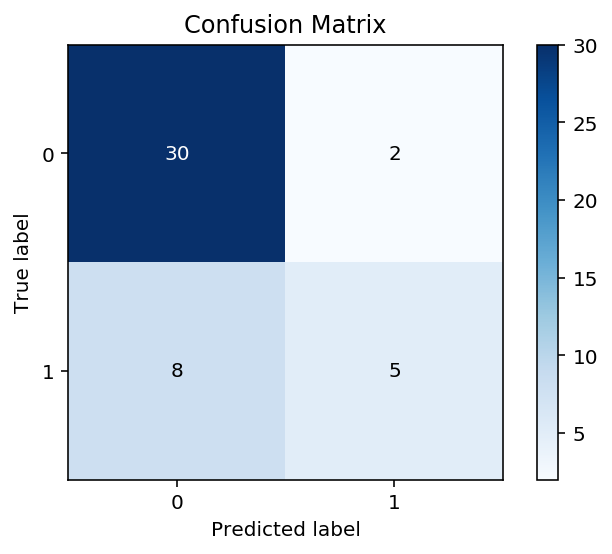

In [43]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(y2_test, y2_test_pred)

#### ROC Curve

In [45]:
test_scores_reg = model2.predict_proba(X2_test)

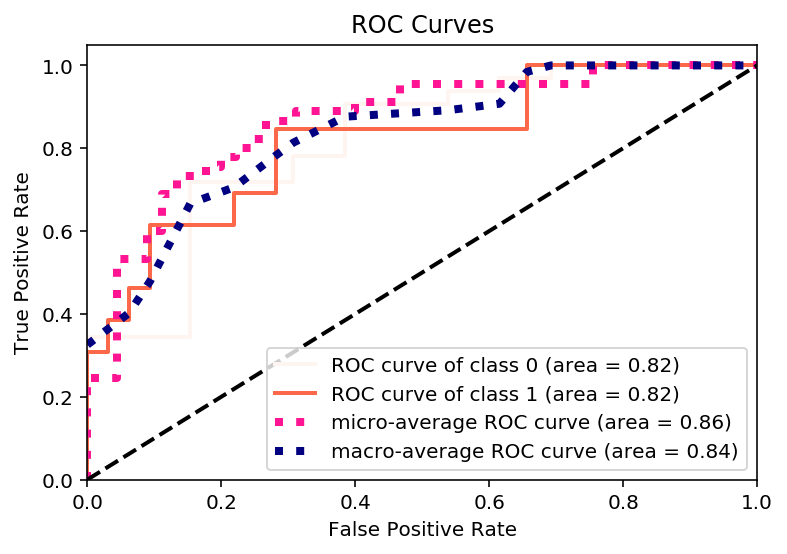

In [60]:
skplt.metrics.plot_roc(y2_test, test_scores_reg, cmap='Reds')

#### Cumulative Gain Curve

C:\Users\dwalz\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


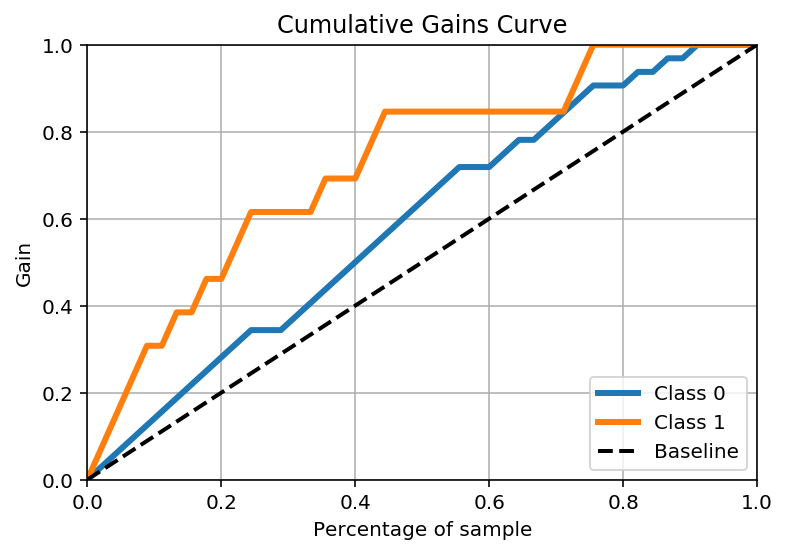

In [61]:
skplt.metrics.plot_cumulative_gain(y2_test, test_scores_reg)

#### Lift Curve

C:\Users\dwalz\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


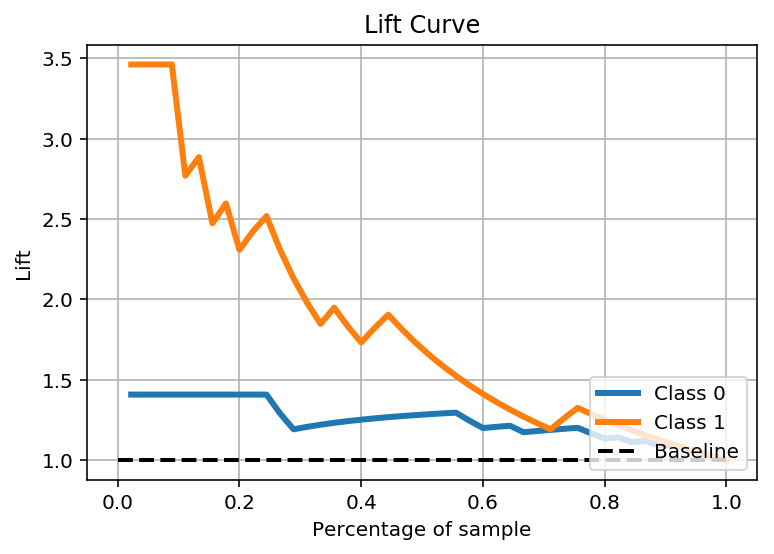

In [51]:
skplt.metrics.plot_lift_curve(y2_test, test_scores_reg)

#### KS Statistic Plot 

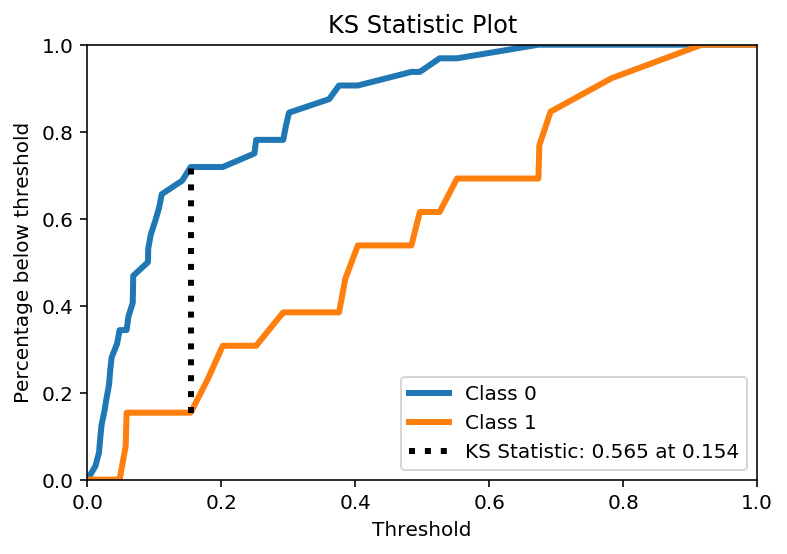

In [52]:
skplt.metrics.plot_ks_statistic(y2_test, test_scores_reg)

# 2) PCA Approach

In [ ]:
#Use Principal Component Analysis to detect the most important features

## 2.1) Linear Regression

## 2.2) Logistic Regression

# 3) Comparison between Non-PCA and PCA Approaches 

## 3.1) Linear Regression

## 3.2) Logistic Regression